## Bibliotecas y funciones



Primero cargamos las bibliotecas de Python que vamos a necesitar y definimos algunas funciones. Usamos la biblioteca estándar `csv`, las bibliotecas `numpy`, `pandas`, `matplotlib` y `networkx`.

La función `graph_from_csv` tiene como argumento un archivo `.csv` y regresa una gráfica con pesos, donde los nodos se llaman como las columnas y renglones del archivo `.csv`.

La función `Fiedler` tiene como argumento una gráfica (con o sin pesos). Devuelve la conectividad algebraica, un vector Fiedler, y el resto de los eigenvalores con multiplicidad.

Las funciones  `quitar_uno` y  `regiones_especificas` son funciones ad-hoc para explorar las gráficas con vértices en `all_nodes` La función `quitar_uno` devuelve la conectividad algebraica de todas las subgráficas que se obtienen al quitar un solo nodo. La función`regiones_especificas` devuelve la conectividad algebraica para los subconjuntos de nodos en diferentes secciones.

In [270]:
import numpy as np
from numpy import linalg as al
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

from itertools import combinations
from random import random


#conjuntos de nodos

all_nodes = ['C3', 'C4', 'CZ', 'EMG', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FZ', 'LOG', 'O1', 'O2', 'P3', 'P4', 'PZ', 
             'ROG', 'T3', 'T4', 'T5', 'T6']

frontal=['F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FZ','LOG','ROG']
central=['C3', 'C4', 'CZ']
left = ['C3', 'F3', 'F7', 'FP1', 'LOG', 'O1','P3','T3',  'T5']
middle = ['CZ','FZ','PZ']
right = ['C4','F4', 'F8', 'FP2',  'O2', 'P4', 'ROG', 'T4', 'T6']

zonas=[all_nodes,izquierdo,derecho,central,izquierdo+central,derecho+central,izquierdo+derecho]
zonas_=['all_nodes','izquierdo','derecho','central','izquierdo+central','derecho+central','izquierdo+derecho']



#-------------------------------------------------------

#funciones varias

def graph_from_csv(filename):
    df = pd.read_csv(filename, index_col=0)
    return nx.from_pandas_adjacency(df)

def positiv(graph):
    for i in graph.nodes:
        for j in graph.nodes:
            if i !=j:
                graph[i][j]['weight'] = abs(graph[i][j]['weight'])
    return(graph)


def random_weighted_graph(the_nodes):
    G = nx.Graph()
    G.add_nodes_from(the_nodes)
    all_edges = combinations(the_nodes, 2)
    elist = [(e[0], e[1], random()) for e in all_edges]
    G.add_weighted_edges_from(elist)
    return G

def selected_graph(graph, param, bigger_than=True):
    vs = list(graph.nodes())
    n = graph.order()
    out = nx.Graph()
    out.add_nodes_from(vs)
    if bigger_than:
        out.add_edges_from([(vs[i], vs[j]) for i in range(n) for j in range(n) if i != j
                            and graph[vs[i]][vs[j]]['weight'] > param])
    else:
        out.add_edges_from([(vs[i], vs[j]) for i in range(n) for j in range(n) if i != j
                            and graph[vs[i]][vs[j]]['weight'] < param])
    return out

def eigenvalores(A):
        av=list(al.eigh(A))
    
        av[0]=av[0].astype(float)
        av[1]=av[1].astype(float)
    
        for i in range(len(av[0]-1)):
            av[0][i]=round(float(av[0][i]),5)
    
        return av[0]
    
def eigenvectores(A):
        av=list(al.eigh(A))
    
        av[1]=av[1].astype(float)
    
        for i in range(len(av[1]-1)):
            for j in range(len(av[1][i]-1)):
                av[1][i][j]=round(float(av[1][i][j]),3)
    
        return av[1].T
    
def Fiedler(G):
        lap=nx.laplacian_matrix(G)
        print("valor Fiedler")
        print(eigenvalores(lap.A)[1])
        print("vector Fiedler")
        print(eigenvectores(lap.A)[1])
        print("los eigenvalores")
        print(eigenvalores(lap.A))
    
    # Función genérica para el cociente de Rayleigh para una matriz y un vector,
    
def rayleigh(A,v):
        numerador = sp.dot(sp.dot(A,v),v)
        denominador = sp.dot(v,v)
        S = numerador/denominador
        return S
    
#--------------------------------------------------------    

#funciones particulares para explorar valores Fiedler de subgráficas

def quitar_uno(G):
    lap=nx.laplacian_matrix(positiv(G))
    #Fiedler(positiv(G))

    print("El valor Fiedler de toda la gráfica es",round(nx.algebraic_connectivity(positiv(G)),5))
    print("\n")

    valores_nodos=dict(zip(G.nodes,eigenvectores(lap.A)[1]))
    print("El eigenvector Fiedler correspondiente es",valores_nodos)

    todos=set(G.nodes)                     
                     
    nuevas=tuple([round(nx.algebraic_connectivity(positiv(G).subgraph(todos-{nodo})),5) for nodo in positiv(G).nodes])

    print("\n")
    print("Valores Fiedler, quitando el nodo que se indica: ")
    d=dict(zip(todos,nuevas))
    print(d)

    i = 0
    print("\n")

    for nodo in G.nodes:
        if nuevas[i] == max(nuevas):
            print(tuple(G.nodes)[i],"You are the weakest link")
            print("Quitando",tuple(G.nodes)[i],"el valor Fiedler alcanza su máximo, que es",round(nuevas[i],5))
            break
        i = i+1

    nx.draw_circular(positiv(G).subgraph(todos-{nodo}),with_labels=True)  
    
    
def regiones_especificas(G):
    subs=list()

    [subs.append(positiv(G).subgraph(zona)) for zona in zonas] 

    print("\n\n Valores Fiedler por regiones\n")

    for i in range(len(zonas)):
        print(zonas_[i],"         ",round(nx.algebraic_connectivity(subs[i]),5))


# AEFP


El valor Fiedler de toda la gráfica es 0.02162


El eigenvector Fiedler correspondiente es {'C3': 0.047, 'C4': 0.047, 'CZ': 0.047, 'EMG': 0.035, 'F3': 0.047, 'F4': 0.047, 'F7': 0.047, 'F8': 0.047, 'FP1': 0.047, 'FP2': 0.044, 'FZ': 0.047, 'LOG': 0.046, 'O1': 0.047, 'O2': 0.047, 'P3': -0.977, 'P4': 0.047, 'PZ': 0.047, 'ROG': 0.047, 'T3': 0.047, 'T4': 0.047, 'T5': 0.047, 'T6': 0.047}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 0.02076, 'ROG': 0.02107, 'O2': 0.02113, 'P3': 0.01745, 'T4': 0.02102, 'F3': 0.02103, 'T5': 0.0211, 'C3': 0.02069, 'C4': 0.02075, 'T3': 0.01998, 'EMG': 0.02103, 'LOG': 0.019, 'FZ': 0.02112, 'F8': 0.02117, 'P4': 0.29999, 'F4': 0.02118, 'CZ': 0.021, 'T6': 0.0193, 'FP1': 0.0212, 'O1': 0.02096, 'F7': 0.02121, 'FP2': 0.02116}


P3 You are the weakest link
Quitando P3 el valor Fiedler alcanza su máximo, que es 0.29999


 Valores Fiedler por regiones

all_nodes           0.02162
izquierdo           0.00767
derecho           0.09947
central           0.77761
i

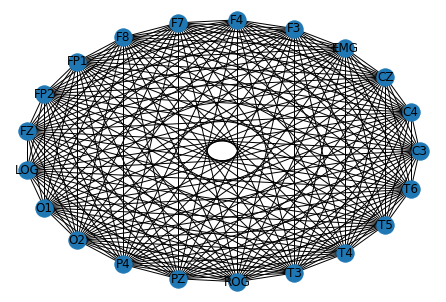

In [271]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_AEFP.csv')
quitar_uno(G)
regiones_especificas(G)

# CLMN



El valor Fiedler de toda la gráfica es 1.67138


El eigenvector Fiedler correspondiente es {'C3': 0.005, 'C4': 0.003, 'CZ': 0.006, 'EMG': -0.788, 'F3': 0.007, 'F4': 0.004, 'F7': 0.016, 'F8': 0.003, 'FP1': 0.022, 'FP2': 0.019, 'FZ': 0.006, 'LOG': 0.037, 'O1': 0.006, 'O2': 0.001, 'P3': 0.006, 'P4': 0.007, 'PZ': 0.008, 'ROG': 0.614, 'T3': 0.006, 'T5': 0.007, 'T6': 0.005}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 1.58656, 'ROG': 1.54145, 'O2': 1.56187, 'P3': 1.76903, 'F3': 1.59681, 'T5': 1.55826, 'C3': 1.61107, 'C4': 1.5433, 'T3': 1.63756, 'EMG': 1.61469, 'LOG': 1.55967, 'FZ': 1.54887, 'F8': 1.58338, 'P4': 1.55528, 'F4': 1.58731, 'CZ': 1.59631, 'T6': 1.56588, 'FP1': 1.72601, 'O1': 1.63154, 'F7': 1.60206, 'FP2': 1.53554}


EMG You are the weakest link
Quitando EMG el valor Fiedler alcanza su máximo, que es 1.76903
Valores Fiedler

all_nodes           1.67138
izquierdo           2.23919
derecho           0.72379
central           2.0849
izquierdo+central           2.91765
de

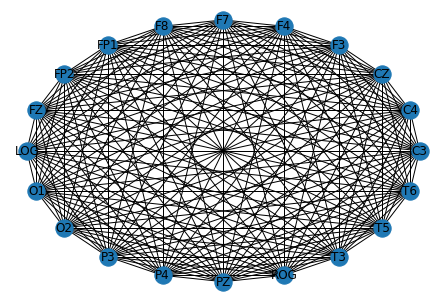

In [269]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_CLMN.csv')
quitar_uno(G)
regiones_especificas(G)

# EMNN

El valor Fiedler de toda la gráfica es 0.79542


El eigenvector Fiedler correspondiente es {'C3': -0.045, 'C4': -0.047, 'CZ': -0.044, 'EMG': 0.977, 'F3': -0.047, 'F4': -0.042, 'F7': -0.051, 'F8': -0.05, 'FP1': -0.045, 'FP2': -0.042, 'FZ': -0.044, 'LOG': -0.039, 'O1': -0.051, 'O2': -0.053, 'P3': -0.047, 'P4': -0.046, 'PZ': -0.047, 'ROG': -0.041, 'T3': -0.05, 'T4': -0.043, 'T5': -0.052, 'T6': -0.051}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 0.74595, 'ROG': 0.75763, 'O2': 0.73766, 'P3': 5.63493, 'T4': 0.76384, 'F3': 0.73548, 'T5': 0.78414, 'C3': 0.78478, 'C4': 0.7487, 'T3': 0.73883, 'EMG': 0.73795, 'LOG': 0.72096, 'FZ': 0.78887, 'F8': 0.79614, 'P4': 0.76053, 'F4': 0.75229, 'CZ': 0.75863, 'T6': 0.73465, 'FP1': 0.78292, 'O1': 0.72952, 'F7': 0.79549, 'FP2': 0.78786}


EMG You are the weakest link
Quitando EMG el valor Fiedler alcanza su máximo, que es 5.63493


 Valores Fiedler por regiones

all_nodes           0.79542
izquierdo           2.39294
derecho           2.05265
c

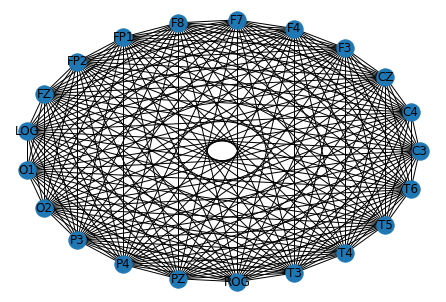

In [272]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_EMNN.csv')
quitar_uno(G)
regiones_especificas(G)

# FGH

El valor Fiedler de toda la gráfica es 0.26219


El eigenvector Fiedler correspondiente es {'C3': -0.096, 'C4': -0.097, 'CZ': -0.096, 'EMG': -0.097, 'F3': 0.453, 'F4': -0.097, 'F7': 0.453, 'F8': -0.096, 'FP1': 0.453, 'FP2': 0.449, 'FZ': -0.096, 'LOG': -0.1, 'O1': -0.096, 'O2': -0.097, 'P3': -0.124, 'P4': -0.138, 'PZ': -0.096, 'ROG': -0.094, 'T3': -0.096, 'T4': -0.096, 'T5': -0.097, 'T6': -0.097}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 0.24369, 'ROG': 0.24986, 'O2': 0.24936, 'P3': 0.25162, 'T4': 0.25304, 'F3': 0.25049, 'T5': 0.25329, 'C3': 0.24758, 'C4': 0.25185, 'T3': 0.24359, 'EMG': 0.24925, 'LOG': 0.25787, 'FZ': 0.24504, 'F8': 0.25258, 'P4': 0.26046, 'F4': 0.25583, 'CZ': 0.24861, 'T6': 0.24046, 'FP1': 0.24701, 'O1': 0.24848, 'F7': 0.2528, 'FP2': 0.25276}


P3 You are the weakest link
Quitando P3 el valor Fiedler alcanza su máximo, que es 0.26046


 Valores Fiedler por regiones

all_nodes           0.26219
izquierdo           0.09894
derecho           0.12378
centra

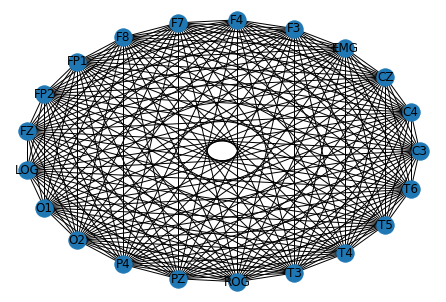

In [273]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_FGH.csv')
quitar_uno(G)
regiones_especificas(G)

# GH

El valor Fiedler de toda la gráfica es 0.07952


El eigenvector Fiedler correspondiente es {'C3': 0.073, 'C4': 0.073, 'CZ': 0.073, 'EMG': -0.165, 'F3': 0.074, 'F4': 0.074, 'F7': 0.073, 'F8': 0.073, 'FP1': -0.358, 'FP2': 0.073, 'FZ': 0.073, 'LOG': 0.07, 'O1': 0.073, 'O2': 0.073, 'P3': 0.073, 'P4': 0.073, 'PZ': 0.073, 'ROG': 0.071, 'T3': 0.073, 'T4': -0.862, 'T5': 0.073, 'T6': 0.073}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 0.07775, 'ROG': 0.07679, 'O2': 0.07701, 'P3': 0.06678, 'T4': 0.07807, 'F3': 0.07806, 'T5': 0.0782, 'C3': 0.07781, 'C4': 0.07234, 'T3': 0.07682, 'EMG': 0.07748, 'LOG': 0.06816, 'FZ': 0.07621, 'F8': 0.07534, 'P4': 0.07636, 'F4': 0.07666, 'CZ': 0.07658, 'T6': 0.07131, 'FP1': 0.07732, 'O1': 0.0898, 'F7': 0.07606, 'FP2': 0.07683}


T4 You are the weakest link
Quitando T4 el valor Fiedler alcanza su máximo, que es 0.0898


 Valores Fiedler por regiones

all_nodes           0.07952
izquierdo           0.03769
derecho           0.02763
central           2.67

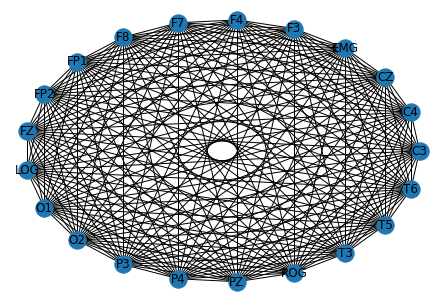

In [274]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_GH.csv')
quitar_uno(G)
regiones_especificas(G)

# GURM

El valor Fiedler de toda la gráfica es 0.3504


El eigenvector Fiedler correspondiente es {'C3': -0.042, 'C4': -0.043, 'CZ': -0.042, 'EMG': 0.974, 'F3': -0.058, 'F4': -0.055, 'F7': -0.056, 'F8': -0.055, 'FP1': -0.058, 'FP2': -0.057, 'FZ': -0.056, 'LOG': -0.011, 'O1': -0.042, 'O2': -0.044, 'P3': -0.044, 'P4': -0.08, 'PZ': -0.044, 'ROG': -0.001, 'T3': -0.052, 'T4': -0.048, 'T5': -0.043, 'T6': -0.045}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 0.3282, 'ROG': 0.33266, 'O2': 0.33065, 'P3': 0.62182, 'T4': 0.34986, 'F3': 0.3433, 'T5': 0.34822, 'C3': 0.34422, 'C4': 0.35001, 'T3': 0.34778, 'EMG': 0.35081, 'LOG': 0.25867, 'FZ': 0.32523, 'F8': 0.3437, 'P4': 0.34306, 'F4': 0.34513, 'CZ': 0.33905, 'T6': 0.2635, 'FP1': 0.34568, 'O1': 0.34098, 'F7': 0.3386, 'FP2': 0.34646}


EMG You are the weakest link
Quitando EMG el valor Fiedler alcanza su máximo, que es 0.62182


 Valores Fiedler por regiones

all_nodes           0.3504
izquierdo           0.67049
derecho           0.27082
centra

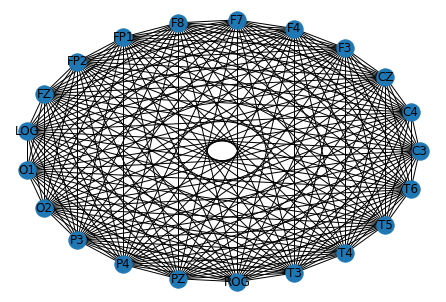

In [275]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_GURM.csv')
quitar_uno(G)
regiones_especificas(G)

# JANA

El valor Fiedler de toda la gráfica es 6.8776


El eigenvector Fiedler correspondiente es {'C3': -0.083, 'C4': -0.128, 'CZ': -0.089, 'EMG': -0.129, 'F3': 0.003, 'F4': -0.071, 'F7': 0.041, 'F8': -0.089, 'FP1': 0.105, 'FP2': 0.098, 'FZ': 0.016, 'LOG': 0.893, 'O1': -0.101, 'O2': -0.1, 'P3': -0.089, 'P4': -0.106, 'PZ': -0.092, 'ROG': 0.218, 'T3': -0.054, 'T4': -0.061, 'T5': -0.077, 'T6': -0.104}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 6.60174, 'ROG': 6.80514, 'O2': 6.6223, 'P3': 6.7369, 'T4': 6.32894, 'F3': 6.53809, 'T5': 6.43192, 'C3': 6.60395, 'C4': 6.33303, 'T3': 6.36719, 'EMG': 6.24877, 'LOG': 7.78634, 'FZ': 6.68031, 'F8': 6.67179, 'P4': 6.62896, 'F4': 6.70565, 'CZ': 6.63631, 'T6': 6.3819, 'FP1': 6.49789, 'O1': 6.48208, 'F7': 6.57746, 'FP2': 6.69317}


LOG You are the weakest link
Quitando LOG el valor Fiedler alcanza su máximo, que es 7.78634


 Valores Fiedler por regiones

all_nodes           6.8776
izquierdo           3.07177
derecho           2.80391
central    

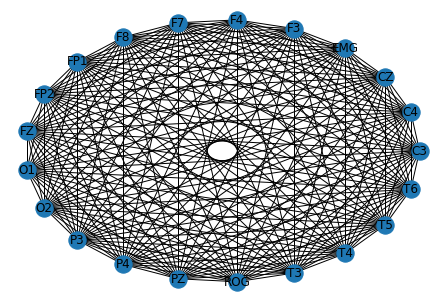

In [276]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_JANA.csv')
quitar_uno(G)
regiones_especificas(G)

# JGMN

El valor Fiedler de toda la gráfica es 0.26188


El eigenvector Fiedler correspondiente es {'C3': -0.045, 'C4': -0.045, 'CZ': -0.048, 'EMG': -0.045, 'F3': 0.977, 'F4': -0.045, 'F7': -0.045, 'F8': -0.045, 'FP1': -0.046, 'FP2': -0.046, 'FZ': -0.045, 'LOG': -0.051, 'O1': -0.048, 'O2': -0.047, 'P3': -0.048, 'P4': -0.046, 'PZ': -0.048, 'ROG': -0.048, 'T3': -0.047, 'T4': -0.047, 'T5': -0.047, 'T6': -0.046}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 0.23929, 'ROG': 0.24197, 'O2': 0.26034, 'P3': 0.24699, 'T4': 1.77438, 'F3': 0.24179, 'T5': 0.23601, 'C3': 0.23946, 'C4': 0.252, 'T3': 0.24879, 'EMG': 0.24136, 'LOG': 0.2576, 'FZ': 0.2592, 'F8': 0.2513, 'P4': 0.26227, 'F4': 0.24573, 'CZ': 0.25972, 'T6': 0.26023, 'FP1': 0.25041, 'O1': 0.25229, 'F7': 0.25593, 'FP2': 0.2465}


F3 You are the weakest link
Quitando F3 el valor Fiedler alcanza su máximo, que es 1.77438


 Valores Fiedler por regiones

all_nodes           0.26188
izquierdo           0.09305
derecho           1.02955
centra

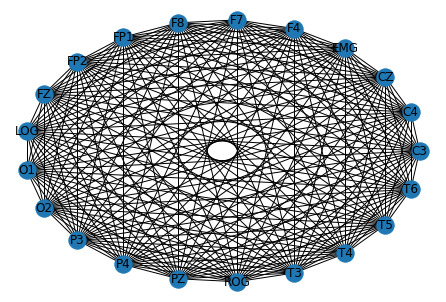

In [277]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_JGMN.csv')
quitar_uno(G)
regiones_especificas(G)

# MGNA

El valor Fiedler de toda la gráfica es 0.18789


El eigenvector Fiedler correspondiente es {'C3': 0.045, 'C4': 0.045, 'CZ': 0.045, 'EMG': 0.047, 'F3': -0.977, 'F4': 0.045, 'F7': 0.045, 'F8': 0.045, 'FP1': 0.058, 'FP2': 0.047, 'FZ': 0.045, 'LOG': 0.052, 'O1': 0.045, 'O2': 0.045, 'P3': 0.045, 'P4': 0.045, 'PZ': 0.045, 'ROG': 0.05, 'T3': 0.045, 'T4': 0.045, 'T5': 0.045, 'T6': 0.045}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 0.18156, 'ROG': 0.18072, 'O2': 0.17577, 'P3': 0.18122, 'T4': 0.91551, 'F3': 0.181, 'T5': 0.17858, 'C3': 0.17837, 'C4': 0.18702, 'T3': 0.18038, 'EMG': 0.17237, 'LOG': 0.18533, 'FZ': 0.17922, 'F8': 0.17683, 'P4': 0.17514, 'F4': 0.17768, 'CZ': 0.17654, 'T6': 0.18345, 'FP1': 0.17934, 'O1': 0.17766, 'F7': 0.17905, 'FP2': 0.17894}


F3 You are the weakest link
Quitando F3 el valor Fiedler alcanza su máximo, que es 0.91551


 Valores Fiedler por regiones

all_nodes           0.18789
izquierdo           0.06517
derecho           0.91923
central           2.432

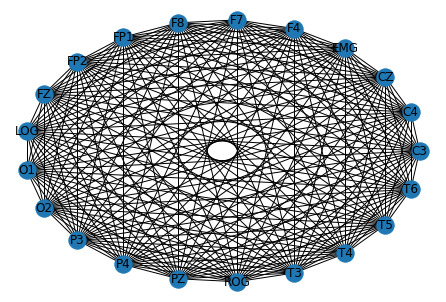

In [278]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_MGNA.csv')
quitar_uno(G)
regiones_especificas(G)

# MJNN

El valor Fiedler de toda la gráfica es 0.99859


El eigenvector Fiedler correspondiente es {'C3': 0.046, 'C4': 0.046, 'CZ': 0.047, 'EMG': 0.051, 'F3': 0.048, 'F4': 0.05, 'F7': 0.045, 'F8': 0.048, 'FP1': 0.043, 'FP2': 0.049, 'FZ': 0.047, 'LOG': 0.044, 'O1': 0.047, 'O2': 0.047, 'P3': 0.047, 'P4': 0.045, 'PZ': 0.047, 'ROG': -0.977, 'T3': 0.047, 'T4': 0.04, 'T5': 0.047, 'T6': 0.048}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 0.9538, 'ROG': 0.94347, 'O2': 0.96113, 'P3': 0.98421, 'T4': 0.96848, 'F3': 0.98587, 'T5': 0.92925, 'C3': 0.96317, 'C4': 0.90066, 'T3': 0.97948, 'EMG': 0.96506, 'LOG': 0.94051, 'FZ': 0.96442, 'F8': 0.95582, 'P4': 0.95793, 'F4': 0.93389, 'CZ': 0.9554, 'T6': 7.63123, 'FP1': 0.95824, 'O1': 0.88602, 'F7': 0.95804, 'FP2': 0.97129}


ROG You are the weakest link
Quitando ROG el valor Fiedler alcanza su máximo, que es 7.63123


 Valores Fiedler por regiones

all_nodes           0.99859
izquierdo           3.50755
derecho           0.41409
central           2.33

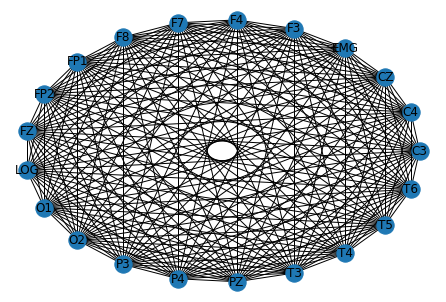

In [279]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_MJNN.csv')
quitar_uno(G)
regiones_especificas(G)

# PCM

El valor Fiedler de toda la gráfica es 1.74688


El eigenvector Fiedler correspondiente es {'C3': -0.043, 'C4': -0.04, 'CZ': -0.04, 'EMG': 0.975, 'F3': -0.048, 'F4': -0.043, 'F7': -0.04, 'F8': -0.042, 'FP1': -0.049, 'FP2': -0.058, 'FZ': -0.041, 'LOG': -0.097, 'O1': -0.04, 'O2': -0.04, 'P3': -0.041, 'P4': -0.042, 'PZ': -0.04, 'ROG': -0.069, 'T3': -0.041, 'T4': -0.04, 'T5': -0.04, 'T6': -0.04}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 1.68297, 'ROG': 1.63972, 'O2': 1.64694, 'P3': 3.27271, 'T4': 1.708, 'F3': 1.64795, 'T5': 1.64893, 'C3': 1.64919, 'C4': 1.69064, 'T3': 1.70622, 'EMG': 1.63466, 'LOG': 1.74423, 'FZ': 1.64884, 'F8': 1.64845, 'P4': 1.65492, 'F4': 1.677, 'CZ': 1.64538, 'T6': 1.72459, 'FP1': 1.66692, 'O1': 1.63991, 'F7': 1.65264, 'FP2': 1.64999}


EMG You are the weakest link
Quitando EMG el valor Fiedler alcanza su máximo, que es 3.27271


 Valores Fiedler por regiones

all_nodes           1.74688
izquierdo           0.85731
derecho           2.03831
central    

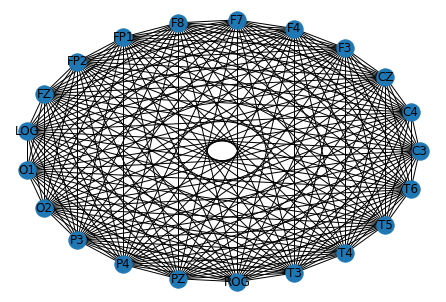

In [280]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_PCM.csv')
quitar_uno(G)
regiones_especificas(G)

# RLMN

El valor Fiedler de toda la gráfica es 0.40384


El eigenvector Fiedler correspondiente es {'C3': 0.05, 'C4': 0.05, 'EMG': 0.066, 'F3': 0.052, 'F4': 0.052, 'F7': 0.052, 'F8': 0.052, 'FP2': 0.052, 'FZ': 0.049, 'LOG': 0.057, 'O1': 0.044, 'O2': 0.049, 'P3': 0.047, 'P4': 0.048, 'PZ': 0.048, 'ROG': 0.056, 'T3': 0.052, 'T4': 0.052, 'T5': -0.974, 'T6': 0.047}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 0.38697, 'ROG': 0.38215, 'O2': 0.39627, 'P3': 0.39707, 'T4': 0.39404, 'F3': 0.40175, 'T5': 0.39894, 'C3': 0.39353, 'C4': 0.37546, 'T3': 0.40128, 'EMG': 0.33723, 'LOG': 0.38076, 'FZ': 0.35994, 'F8': 0.36122, 'P4': 0.36284, 'F4': 0.40125, 'T6': 0.39732, 'O1': 0.40005, 'F7': 1.11174, 'FP2': 0.36016}


T5 You are the weakest link
Quitando T5 el valor Fiedler alcanza su máximo, que es 1.11174


 Valores Fiedler por regiones

all_nodes           0.40384
izquierdo           0.1643
derecho           1.52058
central           1.71789
izquierdo+central           0.18624
derecho+central    

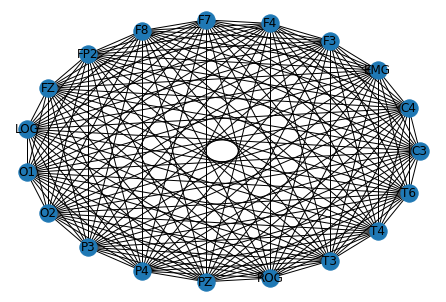

In [281]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_RLMN.csv')
quitar_uno(G)
regiones_especificas(G)

# RRMN

El valor Fiedler de toda la gráfica es 1.1166


El eigenvector Fiedler correspondiente es {'C3': 0.074, 'C4': 0.113, 'CZ': 0.119, 'F3': -0.272, 'F4': -0.288, 'F7': -0.363, 'F8': -0.36, 'FP1': -0.225, 'FP2': -0.263, 'FZ': -0.281, 'LOG': 0.325, 'O1': 0.11, 'O2': 0.111, 'P3': 0.12, 'P4': 0.116, 'PZ': 0.112, 'ROG': 0.329, 'T3': 0.178, 'T4': 0.115, 'T5': 0.115, 'T6': 0.115}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 1.06171, 'ROG': 1.07194, 'O2': 1.08415, 'P3': 1.0247, 'T4': 1.05796, 'F3': 1.1539, 'T5': 1.17613, 'C3': 0.93628, 'C4': 1.01208, 'T3': 1.04747, 'LOG': 1.09357, 'FZ': 1.02902, 'F8': 1.02345, 'P4': 1.08535, 'F4': 1.0297, 'CZ': 1.02017, 'T6': 1.1274, 'FP1': 1.07543, 'O1': 1.07246, 'F7': 1.07063, 'FP2': 1.03029}


F8 You are the weakest link
Quitando F8 el valor Fiedler alcanza su máximo, que es 1.17613


 Valores Fiedler por regiones

all_nodes           1.1166
izquierdo           0.43701
derecho           0.46216
central           0.26541
izquierdo+central          

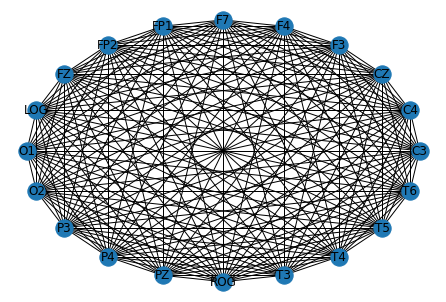

In [282]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_RRMN.csv')
quitar_uno(G)
regiones_especificas(G)

# VCNN

El valor Fiedler de toda la gráfica es 0.06325


El eigenvector Fiedler correspondiente es {'C3': -0.047, 'C4': -0.048, 'CZ': -0.048, 'EMG': -0.047, 'F3': -0.043, 'F4': 0.977, 'F7': -0.044, 'F8': -0.047, 'FP1': -0.044, 'FP2': -0.042, 'FZ': -0.044, 'LOG': -0.047, 'O1': -0.048, 'O2': -0.048, 'P3': -0.047, 'P4': -0.048, 'PZ': -0.048, 'ROG': -0.047, 'T3': -0.047, 'T4': -0.048, 'T5': -0.048, 'T6': -0.048}


Valores Fiedler, quitando el nodo que se indica: 
{'PZ': 0.0615, 'ROG': 0.06283, 'O2': 0.06179, 'P3': 0.05952, 'T4': 0.05779, 'F3': 1.03087, 'T5': 0.05925, 'C3': 0.05949, 'C4': 0.05865, 'T3': 0.05051, 'EMG': 0.05733, 'LOG': 0.05954, 'FZ': 0.06117, 'F8': 0.06336, 'P4': 0.06179, 'F4': 0.063, 'CZ': 0.06247, 'T6': 0.06, 'FP1': 0.06152, 'O1': 0.06134, 'F7': 0.06303, 'FP2': 0.06188}


F4 You are the weakest link
Quitando F4 el valor Fiedler alcanza su máximo, que es 1.03087


 Valores Fiedler por regiones

all_nodes           0.06325
izquierdo           0.52333
derecho           0.02633
centra

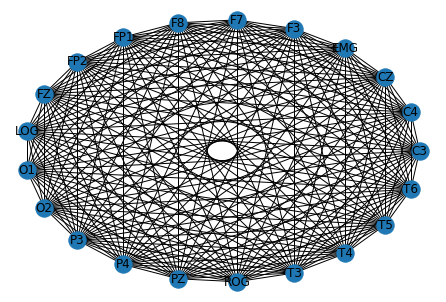

In [283]:
G = graph_from_csv('./variaciones/CorrelacionesREM/correls_VCNN.csv')
quitar_uno(G)
regiones_especificas(G)